In [1]:
import ikpy.chain
import ikpy.utils.plot as plot_utils

import numpy as np
import time
import math

import ipywidgets as widgets
import serial


In [2]:
my_chain = ikpy.chain.Chain.from_urdf_file("SMC Robotic Arm.urdf",active_links_mask=[False, True, True, True])

In [3]:
target_position = [ 0,0,0.68]

target_orientation = [-1,0,0]

In [4]:
ik = my_chain.inverse_kinematics(target_position, target_orientation, orientation_mode="Y")
print("The angles of each joints are : ", list(map(lambda r:math.degrees(r),ik.tolist())))

The angles of each joints are :  [0.0, 0.0, 0.0, 0.0]


In [5]:
computed_position = my_chain.forward_kinematics(ik)
print("Computed position: %s, original position : %s" % (computed_position[:3, 3], target_position))
print("Computed position (readable) : %s" % [ '%.2f' % elem for elem in computed_position[:3, 3] ])

Computed position: [0.   0.   0.45], original position : [0, 0, 0.68]
Computed position (readable) : ['0.00', '0.00', '0.45']


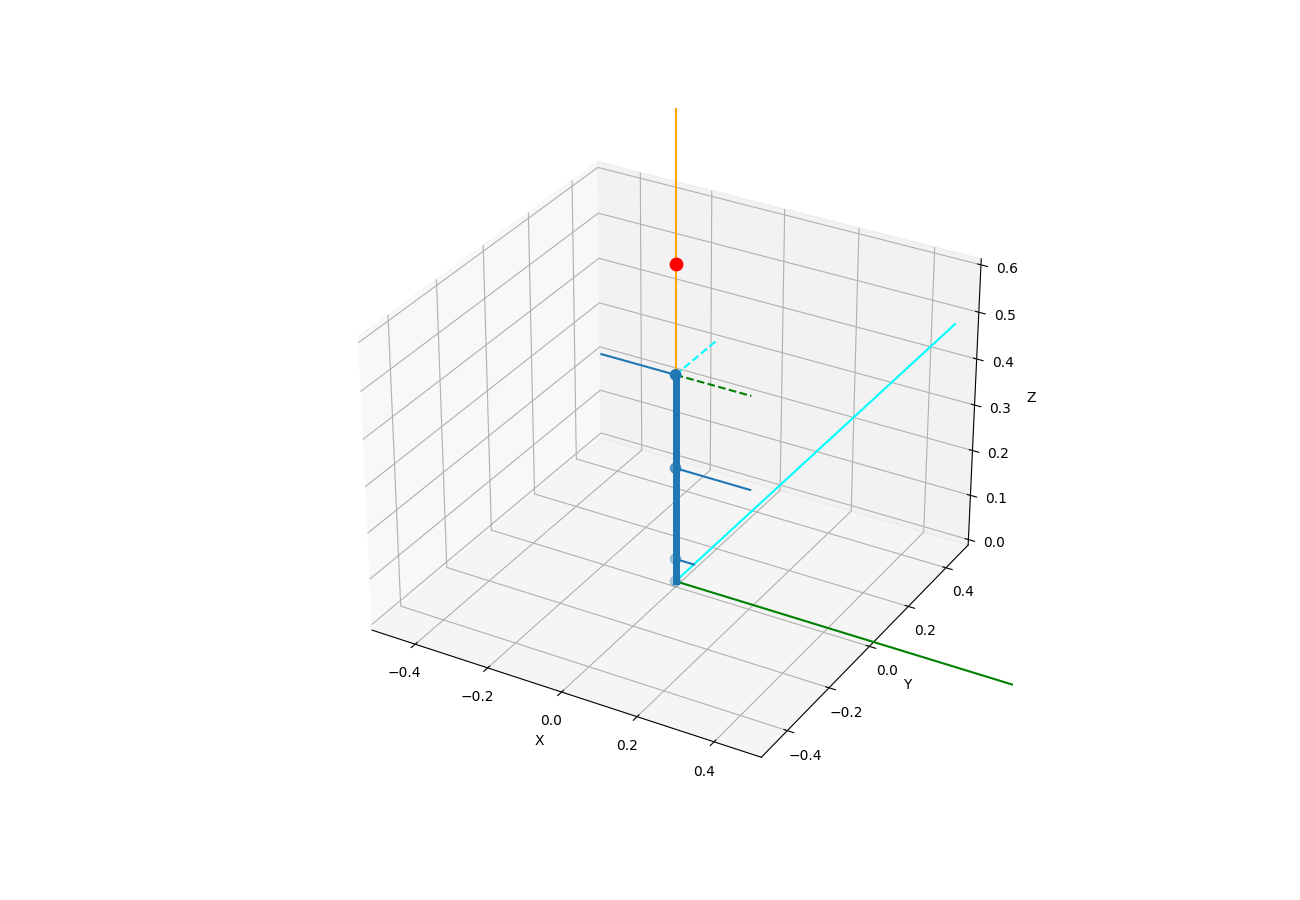

In [6]:
%matplotlib widget
#%matplotlib widget
import matplotlib.pyplot as plt
fig, ax = plot_utils.init_3d_figure()
fig.set_figheight(9)  
fig.set_figwidth(13)  
my_chain.plot(ik, ax, target=target_position)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
ax.set_zlim(0, 0.6)
plt.ion()

In [7]:
def doIK():
    global ik
    old_position= ik.copy()
    ik = my_chain.inverse_kinematics(target_position, target_orientation, orientation_mode="Z", initial_position=old_position)

def updatePlot():
    ax.clear()
    my_chain.plot(ik, ax, target=target_position)
    plt.xlim(-0.5, 0.5)
    plt.ylim(-0.5, 0.5)
    ax.set_zlim(0, 0.6)
    fig.canvas.draw()
    fig.canvas.flush_events()
    
def move(x,y,z):
    global target_position
    target_position = [x,y,z]
    doIK()
    updatePlot()

    sendCommand(ik[1].item(),ik[2].item(),ik[3].item(),ik[4].item(),ik[5].item(),ik[6].item(),1)